# Named Entity Recognition

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/marketPsych-assignment/1_nlp_task

/content/drive/.shortcut-targets-by-id/1gDrFwBRtXghDoh6D_gW_nKopFj61pAYn/marketPsych-assignment/1_nlp_task


## Task 1

In [ ]:
import pandas as pd

with open('sample.txt') as f:
    data = f.readlines()

df = pd.DataFrame(data, columns=['articles'])
print("No. of articles: ", len(df['articles']))

df.drop_duplicates(subset='articles', inplace=True, ignore_index=True)
print("No. of articles after removing duplicate rows: ", len(df['articles']))

No. of articles:  1870
No. of articles after removing duplicate rows:  1529


In [ ]:
df.head()

,articles
0,@fansoniclove Gold the Tenrec\n
1,Tokyo-bound Sampson sets Aust rifle record. Sh...
2,Originally posted by cordingup ↑ I see very in...
3,"""US 500 Futures Discussions. Hey guys what is ..."
4,"Good time to invest in gold?""\n"


In [ ]:
print(df['articles'][0])


@fansoniclove Gold the Tenrec



In [ ]:
import re

cleaned_articles = []
for a in df['articles']:
    a = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", a).split())
    cleaned_articles.append(a)

df = df.assign(cleaned=cleaned_articles)

df.head()


,articles,cleaned
0,@fansoniclove Gold the Tenrec\n,Gold the Tenrec
1,Tokyo-bound Sampson sets Aust rifle record. Sh...,Tokyo bound Sampson sets Aust rifle record Sho...
2,Originally posted by cordingup ↑ I see very in...,Originally posted by cordingup I see very inte...
3,"""US 500 Futures Discussions. Hey guys what is ...",US 500 Futures Discussions Hey guys what is go...
4,"Good time to invest in gold?""\n",Good time to invest in gold


In [ ]:
df['cleaned'][2]

'Originally posted by cordingup I see very interesting says the drill hole 33 now at 688 m so thats 88 m past the planned depth should mean they are still in mineralisation Also i see in the tenements list those other permits around the MCB area they are still pursuing under appeal i guess the appeal is regards large sections of those falling into a National Park One of those tenements from my reckoning hosts a copper gold resource another has a copper prospect Expand That does sound promising Gap up on open'

## Task 2

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
GOLD = 'gold'
SILVER = 'silver'

def contains_gold_silver(article):
    if 'Gold' in article or 'gold' in article:
        return GOLD, True

    if 'Silver' in article or 'silver' in article:
        return SILVER, True

    return None, False

In [ ]:
df = df.assign(gold = False)
df = df.assign(silver = False)
counts = {GOLD: 0, SILVER: 0}

for ind, article in enumerate(df['cleaned']):
    obj, present = contains_gold_silver(article)

    if present:
        if obj == GOLD:
            counts[GOLD] += 1
            df.at[ind, GOLD] = True
        else:
            counts[SILVER] += 1
            df.at[ind, SILVER] = True

df.head()

,articles,cleaned,gold,silver
0,@fansoniclove Gold the Tenrec\n,Gold the Tenrec,True,False
1,Tokyo-bound Sampson sets Aust rifle record. Sh...,Tokyo bound Sampson sets Aust rifle record Sho...,True,False
2,Originally posted by cordingup ↑ I see very in...,Originally posted by cordingup I see very inte...,True,False
3,"""US 500 Futures Discussions. Hey guys what is ...",US 500 Futures Discussions Hey guys what is go...,True,False
4,"Good time to invest in gold?""\n",Good time to invest in gold,True,False


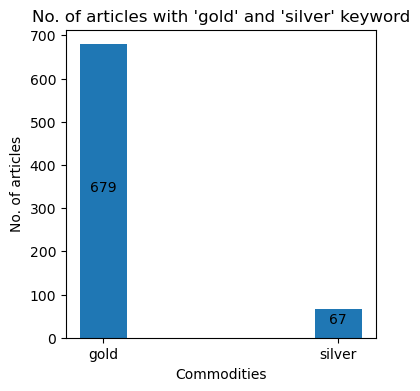

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')

objs = list(counts.keys())
freq = list(counts.values())

fig = plt.figure(figsize=(4, 4))
plt.bar(objs, freq, width=0.2)
addlabels(objs, freq)

plt.xlabel("Commodities")
plt.ylabel("No. of articles")
plt.title("No. of articles with \'gold\' and \'silver\' keyword")
plt.show()

In [ ]:
all_gold = df[df['gold'] == True]
all_silver = df[df['silver'] == True]
for a in all_silver['cleaned'][:10]:
    print(a)
    print('\n')

Every post and comment you have ever made was related to persuading people to buy silver


Originally posted by kervio I think the update said median age of the first set of patients was around mid 50s and median age of the later set of patients was around 69 so they would have only had to have put the inclusion criteria in half way through the trial when the evidence was emerging that age was a huge factor in deaths in order to have a successful trial This is the big what if that might have sent the SP to 10 FDA approval lives saved etc We can give them a pass on not knowing that up front for sure because of the speed in which the trial moved forwards on but I think some reactivity would have saved the day here once more was known about covid in the same way that we found out about comorbidities leading to higher rates of death I disagree with this This disease has been totally wacky in respect of different age cohorts and no one has or has had any idea what is going to happen to any 

In [ ]:
for a in all_gold['cleaned'][:10]:
    print(a)
    print("\n")

Gold the Tenrec


Tokyo bound Sampson sets Aust rifle record Shooter Dane Sampson has struck career best form as he builds towards a third Olympics setting a national record while winning the 50m rifle event at the South Australia championships Sampson registered a score of 462 points to claim gold in the three positions event The performance bettered Sampson s own national record of 460 7 points which he achieved at last month s Wingfield grand prix The score was also notably higher than what Italy s Niccolo Campriani 458 8 and Poland s Tomasz Bartnik 460 4 produced to win gold at the 2016 Olympics and 2018 world championships respectively It s good to be shooting PBs at this stage It was a world class finals score Sampson said having previously competed at the 2012 and 2016 Olympics You are unlikely to lose many competitions with that score I definitely feel that I am getting better and better and I am tracking well for Tokyo Sampson and other members of Australia s shooting team for

**Question: Check how many articles contain each entity. Can you see any issues with this simple approach?**

*Answer:*

There are a total of 1529 articles. 679 articles contain the string 'gold' and 67 articles contain the string 'silver'. Simple keyword matching has the following issues:

1. Many of the articles matched donot refer to 'gold' or 'silver' as a commodity. This is because the algorithm doesn't use any context (rest of the article) to deduce the usage of gold/silver. E.g. of misleading instances are,
    1. "welcomes new board member, mr. ross silver"
    2. "score of 462 points to claim gold in the three positions event."
    3. "abc gold coast - australia"
    
2. The algorithm does simple syntactic matching and not semantic matching with the keywords. Thus, it's possible that many articles that refer to gold/silver as commodity using a different word/notation maybe missed. E.g., XAU for gold.

3. Many of the retrieved articles refer to the string 'gold'/'silver' in an adjective form, e.g.,
    1. golden years
    2. silver fox

## Task 3

(Misleading instances are mentioned in Task 2)


### 1. Reduce false positive

In [ ]:
context = [
    'buy',
    'resource',
    'invest',
    'price',
    'stock',
    'rate',
    'copper',
    'cheap',
    'expensive',
    'currencies',
    'currency',
    'consumer',
    'bought',
    'market',
    'coin',
    'financial',
    'value',
    'money'
]

In [ ]:
def contains_gold_silver_with_context(article):
    obj = None

    if 'Gold' in article or 'gold' in article:
        obj = GOLD

    if 'Silver' in article or 'silver' in article:
        obj =  SILVER

    if obj is not None:
        for word in context:
            if word in article.lower():
                return obj, True

    return None, False

In [ ]:
df = df.assign(gold_with_context = False)
df = df.assign(silver_with_context = False)
counts = {GOLD: 0, SILVER: 0}

for ind, article in enumerate(df['cleaned']):
    obj, present = contains_gold_silver_with_context(article)

    if present:
        if obj == GOLD:
            counts[GOLD] += 1
            df.at[ind, 'gold_with_context'] = True
        else:
            counts[SILVER] += 1
            df.at[ind, 'silver_with_context'] = True

df.head(10)

,articles,cleaned,gold,silver,gold_with_context,silver_with_context
0,@fansoniclove Gold the Tenrec\n,Gold the Tenrec,True,False,False,False
1,Tokyo-bound Sampson sets Aust rifle record. Sh...,Tokyo bound Sampson sets Aust rifle record Sho...,True,False,False,False
2,Originally posted by cordingup ↑ I see very in...,Originally posted by cordingup I see very inte...,True,False,True,False
3,"""US 500 Futures Discussions. Hey guys what is ...",US 500 Futures Discussions Hey guys what is go...,True,False,False,False
4,"Good time to invest in gold?""\n",Good time to invest in gold,True,False,True,False
5,Gold edges lower as firmer US yields pinch app...,Gold edges lower as firmer US yields pinch appeal,True,False,False,False
6,What’s your role in AngloGold Ashanti? – Sam J...,What s your role in AngloGold Ashanti Sam Jona...,True,False,True,False
7,"RT @trspartyonline: TRS@20, a journey towards ...",RT TRS a journey towards Golden Telangana Born...,True,False,False,False
8,91.7 ABC Gold Coast - Australia https://t.co/M...,91 7 ABC Gold Coast Australia Australia Misc,True,False,False,False
9,"Gold Futures Discussions. So, any more short p...",Gold Futures Discussions So any more short pap...,True,False,True,False


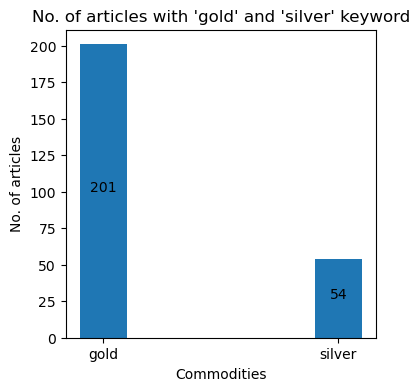

In [ ]:
objs = list(counts.keys())
freq = list(counts.values())

fig = plt.figure(figsize=(4, 4))
plt.bar(objs, freq, width=0.2)
addlabels(objs, freq)

plt.xlabel("Commodities")
plt.ylabel("No. of articles")
plt.title("No. of articles with \'gold\' and \'silver\' keyword")
plt.show()

In [ ]:
for article in df[df['gold_with_context'] == True]['cleaned'][10:20]:
    print(article)
    print('\n')

RT Bitcoin uses energy like cars gold amp finance Valuable things require energy Mining must be greener The BTC LightningN


Re Can Crypto be more valuable than gold BTC is more valuable than Gold right now and many crypto projects will join soon crypto is a work in progress and we are getting nearer to mass adoption finally Gold is still a good investment choice but the future is just more into technology this days


Originally posted by robbo24 Did you take a look at the old mine workings in the tenements Plenty of them Expand just noticed that on one of the tenements there is a Nil desperandum lode One of my other gold copper plays has a Nil desperandum target too Hopefully it s a good sign omen Just a completely useless bit of info that excited my superstitious side i would definitely be happy with some similar results from the NXM tenement


Some very old gold POLICIA NACIONAL investigators traced to Calpe a 716 gold coin that was offered for sale online Only 24 of the gold dinars

### 2. Generalized reduction of false positives

2 solutions
    - to extend spacy
    - to use llm

In [ ]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
# pd.set_option("display.max_rows", 200)

In [ ]:
for article in df[df['gold'] == True]['cleaned'][10:20]:
    doc = nlp(article)
    displacy.render(doc, style="ent")
    print('\n')

- most of the 'gold' instances in the false positives are organizational entities. the actual gold commodity is not even being recoignized by spacy as any entity. need to extend spacy to identify products/commodities.

- also possible that if entity "money" is present then commodity might be present too. however, may lead to FP, e.g. gold standard is 100 USD.

### Trial with LLM

In [3]:
!pip install spacy-llm
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 5.4 MB/s eta 0:00:00


In [4]:
from wasabi import msg
from spacy_llm.util import assemble

text = '"Will you go to Paris with me, Taylor?"'
config_path = 'fewshot.cfg'
examples_path = 'examples.yml'

msg.text(f"Loading config from {config_path}", show=True)
nlp = assemble(
    config_path,
    overrides={}
    if examples_path is None
    else {"paths.examples": str(examples_path)},
)
doc = nlp(text)

msg.text(f"Text: {doc.text}")
msg.text(f"Entities: {[(ent.text, ent.label_) for ent in doc.ents]}")

Loading config from fewshot.cfg


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/819 [00:00<?, ?B/s]

instruct_pipeline.py:   0%|          | 0.00/9.16k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/databricks/dolly-v2-3b:
- instruct_pipeline.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin:   0%|          | 0.00/5.68G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/450 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

Text: "Will you go to Paris with me, Taylor?"
Entities: []


In [6]:
text = "Barack Obama and Taylor went to Europe on Sunday"
doc = nlp(text)
msg.text(f"Text: {doc.text}")
msg.text(f"Entities: {[(ent.text, ent.label_) for ent in doc.ents]}")

Text: Barack Obama and Taylor went to Europe on Sunday
Entities: [('Barack Obama', 'PERSON'), ('Taylor', 'PERSON')]


In [7]:
text = "Barack Obama and Taylor went to Europe on Sunday"
doc = nlp(text)
msg.text(f"Text: {doc.text}")
msg.text(f"Entities: {[(ent.text, ent.label_) for ent in doc.ents]}")

Text: Barack Obama and Taylor went to Europe on Sunday
Entities: [('Barack Obama', 'PERSON'), ('Taylor', 'PERSON'), ('Europe',
'LOCATION')]


In [10]:
text = "Joe Biden stays at the White House"
doc = nlp(text)
msg.text(f"Text: {doc.text}")
msg.text(f"Entities: {[(ent.text, ent.label_) for ent in doc.ents]}")

Text: Joe Biden stays at the White House
Entities: [('Joe Biden', 'PERSON')]
